In [47]:
import pandas as pd
import os
import numpy as np 
import prince
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Batters EDA

In [37]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, '../..', 'data')
filepath = os.path.join(data_dir, 'cleaned/final_batters_df.csv')

batters = pd.read_csv(filepath)



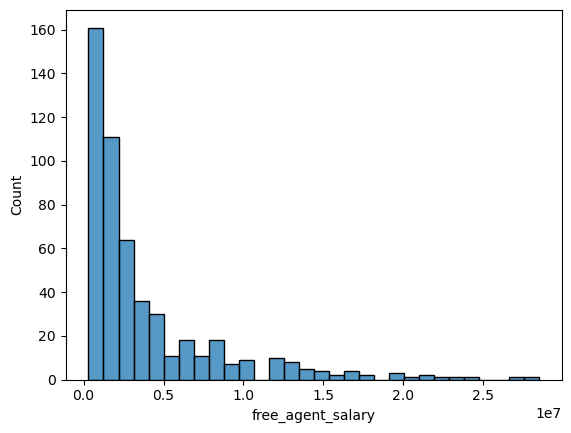

In [38]:

sns.histplot(data=batters, x="free_agent_salary", bins=30)
plt.show()

As you can see, the distribution of free agent salary is heavily focued on smaller contracts, with very few players receiving million dollar salaries. To do linear regression, we'll want to transform our response variable in order to see a normal distribution. Using a log transformation will achieve that.

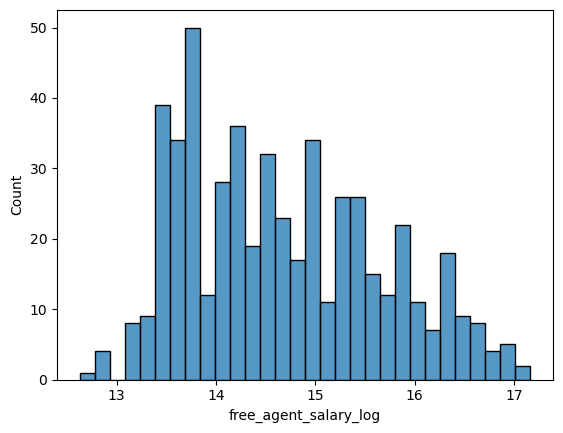

In [39]:
batters["free_agent_salary_log"] = np.log1p(batters["free_agent_salary"])
sns.histplot(data=batters, x="free_agent_salary_log", bins=30)
plt.show()

Now that we have a normal response variable, I want to check the correlations of each numeric feature with the transformed free agent salary. This will let me know which variables seem to be the most related.

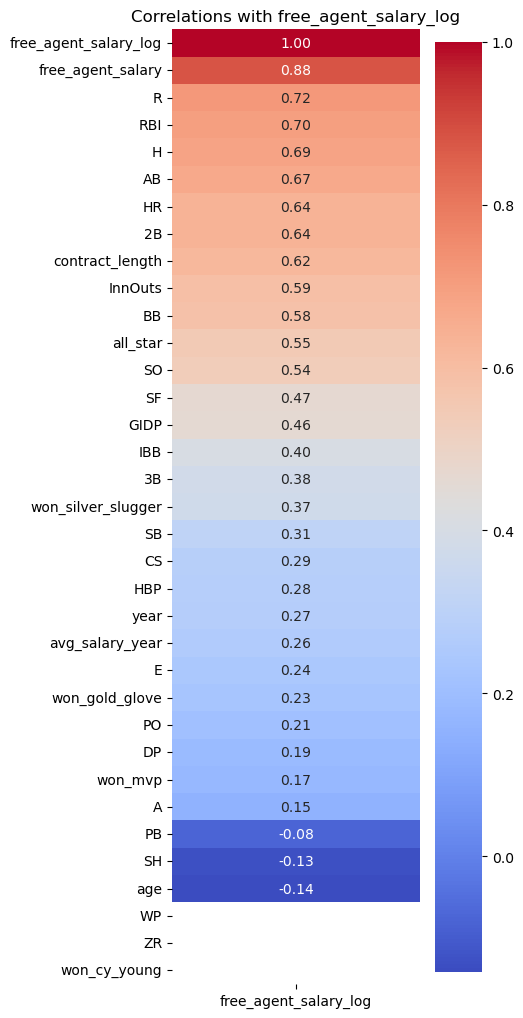

In [40]:
def heatmap_with_target(df, target):
    plt.figure(figsize=(4, len(df.columns)*0.3 + 1))
    corr = df.corr(numeric_only=True)[[target]].sort_values(by=target, ascending=False)
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlations with {target}")
    plt.show()
heatmap_with_target(batters, 'free_agent_salary_log')

These correlations seem to make a lot of sense contextually to baseball. After seeing this, We see an ok to strong relationship with a lot of the positive hitting stats, especially runs and RBIs. We see a slight negative relationship with age which makes sense as if a younger player enters free agency, they will probably be values far more.

## Multicollinearity

In [49]:
X = batters.drop(columns=[
    "playerID","year","free_agent_salary","free_agent_salary_log",
    "row_id","ZR"
])

X = X.select_dtypes(include=[np.number])

# 2. Remove rows with non-finite values (NaN or ±inf)
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Compute VIF safely
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,38.170259
1,avg_salary_year,40.644355
2,contract_length,5.552717
3,AB,612.817287
4,R,193.164429
5,H,544.351801
6,2B,56.919349
7,3B,5.518830
8,HR,55.790417
9,RBI,181.808961


As you can see, our VIFs are extremely high, meaning to do any cogent analysis, we will have to run feature selection such as PCA or Lasso before almost every model. 

## Pitchers

In [41]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, '../..', 'data')
filepath = os.path.join(data_dir, 'cleaned/final_pitchers_df.csv')

pitchers = pd.read_csv(filepath)


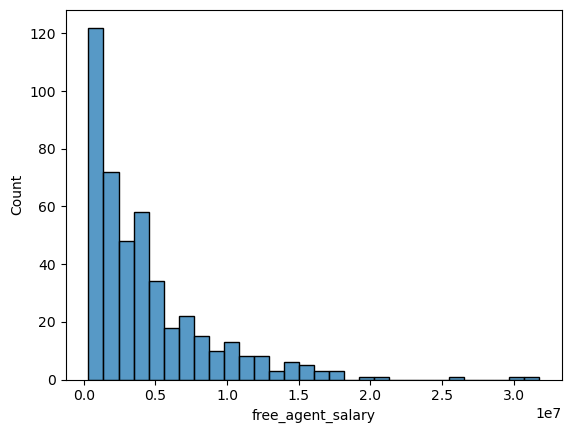

In [42]:

sns.histplot(data=pitchers, x="free_agent_salary", bins=30)
plt.show()


We will apply the same transformation for pitchers

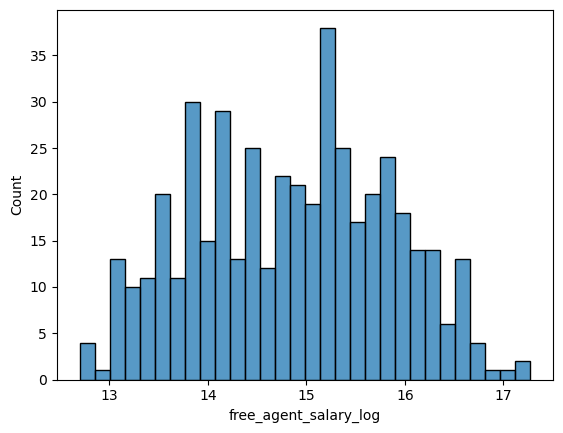

In [43]:
pitchers["free_agent_salary_log"] = np.log1p(pitchers["free_agent_salary"])
sns.histplot(data=pitchers, x="free_agent_salary_log", bins=30)
plt.show()

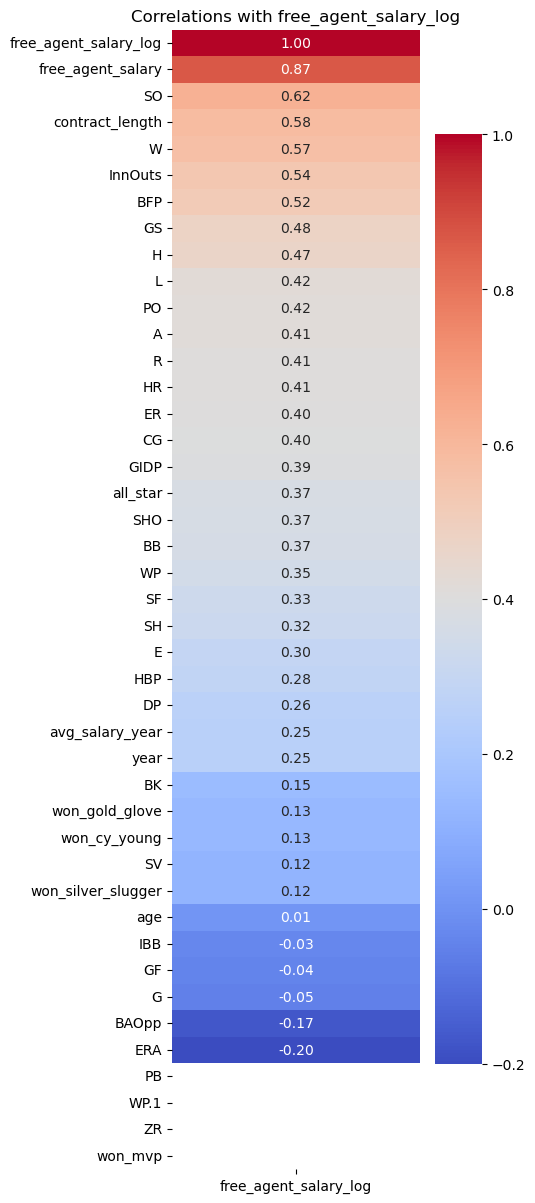

In [44]:
heatmap_with_target(pitchers, 'free_agent_salary_log')

Again, the correlation chart makes a lot of sense. The more strikeouts, innings, and wins a pitcher has, the more they make in free agency. We also see negative relationships with opponent's batting average and earned run average, both stats that pitchers are trying to avoid. This makes sense as 

## Multicollinearity

In [50]:
X = pitchers.drop(columns=[
    "playerID","year","free_agent_salary","free_agent_salary_log",
    "row_id","ZR"
])

X = X.select_dtypes(include=[np.number])

# 2. Remove rows with non-finite values (NaN or ±inf)
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Compute VIF safely
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

c:\Users\josep\miniconda3\envs\ds6001\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,age,61.998101
1,avg_salary_year,36.546370
2,contract_length,5.732952
3,W,38.528955
4,L,37.197223
5,G,54.626179
6,GS,217.204432
7,CG,5.705881
8,SHO,4.101285
9,SV,22.634829


Similar to batters, we have far too high of VIFs. The same feature selection strategies must be implemented before modeling.